<a href="https://colab.research.google.com/github/divyakumar95/emotionAnalysis/blob/main/ML_CA_02_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine learning CA 02

### Question 03

Use dataset available on http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

* Use LDA to classify the dataset into few classes so that at least 90% of information of dataset is explained through new classification. (Hint: model the variable “qtr” to variables “togo”, “kicker”, and “ydline”). How many LDs do you choose? Explain the reason.

* Apply PCA and identify the important principle components involving at least 90% of dataset variation. Explain your decision strategy?  Plot principal components versus their variance.

## Data Preprocessing

Mount drive to colab to use dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset path

https://drive.google.com/file/d/15hGZs9NF7r3RRwcwcna0BHxq_lmDhjoY/view?usp=sharing

In [2]:
import pandas as pd
dataset = '/content/drive/MyDrive/ML_Assignment_data/nfl2008_fga.csv'
data = pd.read_csv(dataset)
data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,kicker,ydline,name,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,15,12,A.Vinatieri,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,15,28,A.Vinatieri,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,15,10,A.Vinatieri,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,15,19,A.Vinatieri,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,15,21,A.Vinatieri,39,1,0,3056,0,0,2008,1,0,0


## Data Preparation

Encode catagorical string data into numerical data

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn import preprocessing
labelencoder = LabelEncoder()

data['AwayTeam'] = labelencoder.fit_transform(data['AwayTeam'])
data['HomeTeam'] = labelencoder.fit_transform(data['HomeTeam'])
data['name'] = labelencoder.fit_transform(data['name'])
data['kickteam'] = labelencoder.fit_transform(data['kickteam'])
data['def'] = labelencoder.fit_transform(data['def'])

data.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,kicker,ydline,name,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,13,7,1,47,2,13,7,4.0,11.0,15,12,0,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,13,12,1,54,47,13,12,4.0,3.0,15,28,0,46,0,0,3287,0,0,2008,1,0,0
2,20081228,30,13,1,45,20,13,30,4.0,3.0,15,10,0,28,1,7,2720,7,0,2008,1,0,0
3,20081012,2,13,1,45,42,13,2,4.0,1.0,15,19,0,37,1,14,2742,14,0,2008,1,0,0
4,20080907,5,13,1,50,56,13,5,4.0,21.0,15,21,0,39,1,0,3056,0,0,2008,1,0,0


Check for NAN in Dataset

In [5]:
data[data.isnull().any(axis=1)]

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,kicker,ydline,name,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
394,20081228,10,11,2,30,7,11,10,NaN,NaN,13,83,18,69,1,7,1807,14,7,2008,0,1,0
459,20081123,20,0,2,30,11,0,20,NaN,NaN,1,86,26,68,1,-5,1811,12,17,2008,0,1,0


#### Drop NANs


In [6]:
data = data.dropna()

Assign to input and output variable

### PDA Approch

In [230]:
X_pca = data.drop('qtr',axis=1)

In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_model = pca.fit_transform(X_pca)

df_pda = pd.DataFrame(pca_model)
df_pda.head()

,0,1,2,3
0,-242.181699,-1123.964811,-23.753003,5.043230
1,-355.869610,-1591.935192,15.616079,5.497234
2,-146.696638,-1019.581374,-5.035537,-3.283853
3,-362.078811,-1046.774967,12.454212,11.221666
4,-459.440576,-1363.368198,25.818471,9.924532


In [232]:
PCA_percetage = pca.explained_variance_ratio_
print(PCA_percetage)

[7.41983553e-01 2.57681266e-01 8.52384059e-05 6.85754644e-05]


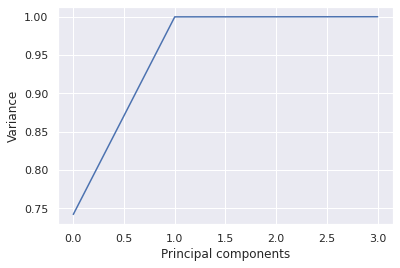

In [233]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel('Variance');

***From the Above PCA ratio we can see 98% of Data is retained within 1st and 2nd component***

### LDA Approch

In [197]:
data_x = data[['qtr','togo','ydline','kicker']]

In [198]:
data_x.head()

,qtr,togo,ydline,kicker
0,1,11.0,12,15
1,1,3.0,28,15
2,1,3.0,10,15
3,1,1.0,19,15
4,1,21.0,21,15


In [256]:
datamean = data_x.groupby('qtr').mean()
transpose = datamean.T
transpose = transpose.reset_index()
transpose['index'] = labelencoder.fit_transform(transpose['index'])
transpose.head()

qtr,index,1,2,3,4,5
0,1,6.481308,6.973190,6.543956,6.792157,5.923077
1,2,17.228972,19.300268,19.032967,18.537255,19.538462
2,0,19.644860,18.772118,19.967033,20.200000,22.615385


In [281]:
X = transpose.drop('index',axis=1)    #data.drop('qtr',axis =1)    #
y = transpose['index']                #data['qtr']               #
y.unique()

array([1, 2, 0])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y)

df_lda=pd.DataFrame(X_lda)
df_lda.columns=[['lda1','lda2']] #,'lda4']]
df_lda.head(4)

In [ ]:
LDA_percetage = lda_model.explained_variance_ratio_
print(LDA_percetage)